In [1]:
import tensorflow as tf 
import numpy as np 
import IPython.display as display
import matplotlib.pyplot as plt

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 2

In [3]:
FILENAMES = tf.io.gfile.glob("data/*.tfrec")

print("Train TFRecord Files:", len(FILENAMES))

Train TFRecord Files: 256


In [4]:
#https://keras.io/examples/keras_recipes/tfrecord/

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [768,768])
    return image

In [5]:
image_feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'image_id': tf.io.FixedLenFeature([], tf.string),
    'No Finding': tf.io.FixedLenFeature([], tf.int64),
    'Atelectasis': tf.io.FixedLenFeature([], tf.int64),
    'Consolidation': tf.io.FixedLenFeature([], tf.int64),
    'Infiltration': tf.io.FixedLenFeature([], tf.int64),
    'Pneumothorax': tf.io.FixedLenFeature([], tf.int64),
    'Edema': tf.io.FixedLenFeature([], tf.int64),
    'Emphysema': tf.io.FixedLenFeature([], tf.int64),
    'Fibrosis': tf.io.FixedLenFeature([], tf.int64),
    'Effusion': tf.io.FixedLenFeature([], tf.int64),
    'Pneumonia': tf.io.FixedLenFeature([], tf.int64),
    'Pleural_Thickening': tf.io.FixedLenFeature([], tf.int64),
    'Cardiomegaly': tf.io.FixedLenFeature([], tf.int64),
    'Nodule': tf.io.FixedLenFeature([], tf.int64),
    'Mass': tf.io.FixedLenFeature([], tf.int64),
    'Hernia': tf.io.FixedLenFeature([], tf.int64)}



def read_tfrecord(example):
    example = tf.io.parse_single_example(example, image_feature_description)
    image = decode_image(example["image"])
    No_Finding = example['No Finding']
    Atelectasis = example['Atelectasis']
    Consolidation = example['Consolidation']
    Infiltration = example['Infiltration']
    Pneumothorax = example['Pneumothorax']
    Edema = example['Edema']
    Emphysema = example['Emphysema']
    Fibrosis = example['Fibrosis']
    Effusion = example['Effusion']
    Pneumonia = example['Pneumonia']
    Pleural_Thickening = example['Pleural_Thickening']
    Cardiomegaly = example['Cardiomegaly']
    Nodule = example['Nodule']
    Mass = example['Mass']
    Hernia = example['Hernia']
       
    if No_Finding == 0:
        label = 1
    else:
        label = 0

    return image, label

In [6]:
def load_dataset(filenames):
    ignore_order = tf.data.Options()
    ignore_order.experimental_deterministic = False  # disable order, increase speed
    dataset = tf.data.TFRecordDataset(
        filenames
    )  # automatically interleaves reads from multiple files
    dataset = dataset.with_options(
        ignore_order
    )  # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    return dataset

In [7]:
def get_dataset(filenames):
    dataset = load_dataset(filenames)
    dataset = dataset.shuffle(2048)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

In [8]:
#train_dataset = get_dataset('data/000-438.tfrec')
train_dataset = get_dataset(FILENAMES[0:3])

In [9]:
image_batch, label_batch = next(iter(train_dataset))


def show_batch(image_batch, label_batch):
    plt.figure(figsize=(8, 8))
    for n in range(8):
        ax = plt.subplot(2, 4, n + 1)
        plt.imshow(image_batch[n] / 255.0,cmap='gray')
        plt.title(label_batch[n])
        plt.axis("off")


show_batch(image_batch.numpy(), label_batch.numpy())

IndexError: index 2 is out of bounds for axis 0 with size 2

In [10]:
def make_model():
    
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(768,768)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    return model

In [11]:
model = make_model()

history = model.fit(
    train_dataset,
    epochs=2,
)

Epoch 1/2
657/657 [==============================] - 160s 243ms/step - loss: 0.6931 - accuracy: 0.5464
Epoch 2/2
657/657 [==============================] - 137s 208ms/step - loss: 0.6931 - accuracy: 0.5426


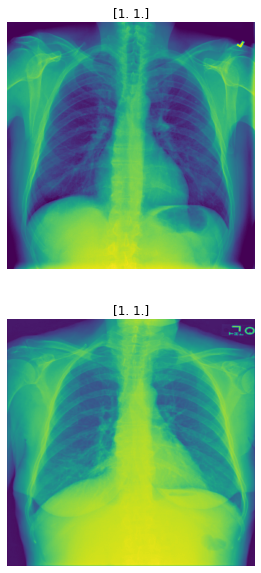

In [13]:
def show_batch_predictions(image_batch):
    plt.figure(figsize=(10, 10))
    for n in range(2):
        ax = plt.subplot(2, 1, n + 1)
        plt.imshow(image_batch[n] / 255.0)
        img_array = tf.expand_dims(image_batch[n], axis=0)
        plt.title(model.predict(img_array)[0])
        plt.axis("off")


image_batch, label_batch = next(iter(train_dataset))

show_batch_predictions(image_batch)

In [18]:
for element in train_dataset:
    print(element)
    break

(<tf.Tensor: shape=(2, 768, 768), dtype=float32, numpy=
array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  2.,   4.,   3., ...,  17.,  22.,  10.],
        ...,
        [  7.,  12.,  11., ..., 192., 196., 124.],
        [  7.,  12.,  11., ..., 193., 194., 129.],
        [  2.,   7.,   6., ..., 106., 118.,  72.]],

       [[  2.,   3.,   3., ...,   5.,   4.,   2.],
        [  4.,   5.,   5., ...,   8.,   8.,   5.],
        [  4.,   5.,   6., ...,   9.,   9.,   6.],
        ...,
        [  5.,   8.,   9., ...,  77.,  81.,  54.],
        [  4.,   7.,   8., ...,  74.,  80.,  54.],
        [  2.,   5.,   5., ...,  43.,  51.,  28.]]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 0], dtype=int32)>)
